# Correlation Analysis

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
insurance = pd.read_csv('../../datasets/insurance.csv')
print(insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


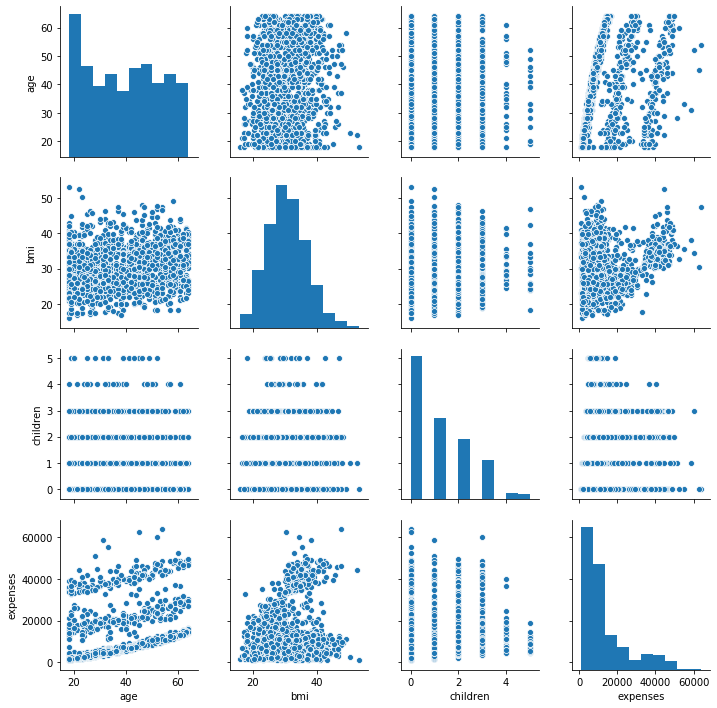

In [15]:
sns.pairplot(insurance)

In [16]:
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [17]:
insurance.corr().style.background_gradient()

,age,bmi,children,expenses
age,1,0.109341,0.042469,0.299008
bmi,0.109341,1,0.0126447,0.198576
children,0.042469,0.0126447,1,0.0679982
expenses,0.299008,0.198576,0.0679982,1


In [18]:
def visualize_corr_matrix(data):
    corr_mat = data.corr()
    for col in corr_mat.columns:
        corr_mat.loc[col, col] = 0
    return np.abs(corr_mat).style.background_gradient()

In [19]:
visualize_corr_matrix(insurance)

,age,bmi,children,expenses
age,0,0.109341,0.042469,0.299008
bmi,0.109341,0,0.0126447,0.198576
children,0.042469,0.0126447,0,0.0679982
expenses,0.299008,0.198576,0.0679982,0


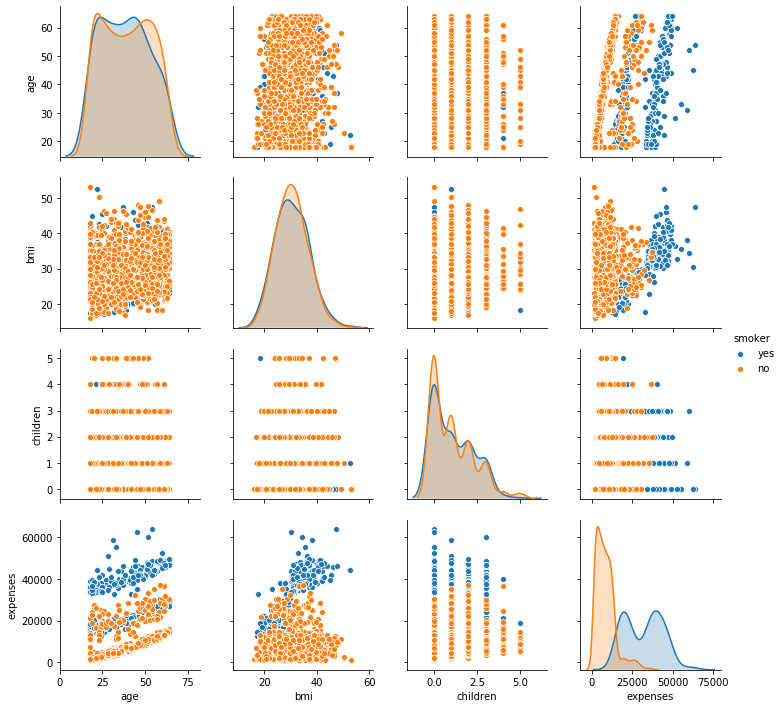

In [20]:
sns.pairplot(data=insurance, hue='smoker')

In [21]:
insurance['is_smoker'] = insurance['smoker'].apply(
    lambda v: 1 if v == 'yes' else 0 )

In [22]:
visualize_corr_matrix(insurance)

,age,bmi,children,expenses,is_smoker
age,0,0.109341,0.042469,0.299008,0.0250188
bmi,0.109341,0,0.0126447,0.198576,0.00396805
children,0.042469,0.0126447,0,0.0679982,0.00767312
expenses,0.299008,0.198576,0.0679982,0,0.787251
is_smoker,0.0250188,0.00396805,0.00767312,0.787251,0


In [23]:
insurance['is_bmi_high'] = insurance['bmi'].apply(
    lambda v: 1 if v > 28 else 0 )
insurance['bmi_smoker'] = insurance['is_bmi_high'] * insurance['is_smoker']
visualize_corr_matrix(insurance)

,age,bmi,children,expenses,is_smoker,is_bmi_high,bmi_smoker
age,0,0.109341,0.042469,0.299008,0.0250188,0.0707762,0.0151963
bmi,0.109341,0,0.0126447,0.198576,0.00396805,0.768772,0.238958
children,0.042469,0.0126447,0,0.0679982,0.00767312,0.0233296,0.00291914
expenses,0.299008,0.198576,0.0679982,0,0.787251,0.153342,0.804108
is_smoker,0.0250188,0.00396805,0.00767312,0.787251,0,0.0152286,0.759374
is_bmi_high,0.0707762,0.768772,0.0233296,0.153342,0.0152286,0,0.285425
bmi_smoker,0.0151963,0.238958,0.00291914,0.804108,0.759374,0.285425,0


In [24]:
insurance['age_smoker'] = insurance['age'] * insurance['is_smoker']
visualize_corr_matrix(insurance)

,age,bmi,children,expenses,is_smoker,is_bmi_high,bmi_smoker,age_smoker
age,0,0.109341,0.042469,0.299008,0.0250188,0.0707762,0.0151963,0.144777
bmi,0.109341,0,0.0126447,0.198576,0.00396805,0.768772,0.238958,0.0141951
children,0.042469,0.0126447,0,0.0679982,0.00767312,0.0233296,0.00291914,0.0203205
expenses,0.299008,0.198576,0.0679982,0,0.787251,0.153342,0.804108,0.789253
is_smoker,0.0250188,0.00396805,0.00767312,0.787251,0,0.0152286,0.759374,0.926984
is_bmi_high,0.0707762,0.768772,0.0233296,0.153342,0.0152286,0,0.285425,0.0118822
bmi_smoker,0.0151963,0.238958,0.00291914,0.804108,0.759374,0.285425,0,0.707112
age_smoker,0.144777,0.0141951,0.0203205,0.789253,0.926984,0.0118822,0.707112,0
